In [39]:
%%writefile -a image_classifier.py
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib


Appending to image_classifier.py


In [6]:

batch_size = 32
img_height = 128
img_width = 128

In [7]:
data_dir="../Images"
data_dir = pathlib.Path(data_dir)


In [8]:
ai = list(data_dir.glob('AI/*'))

In [9]:
real = list(data_dir.glob('Real/*'))

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
    labels="inferred",
    class_names=["AI", "Real"]
)

Found 6643 files belonging to 2 classes.
Using 5315 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
labels="inferred",
    class_names=["AI", "Real"])

Found 6643 files belonging to 2 classes.
Using 1328 files for validation.


In [12]:
classes=val_ds.class_names

In [13]:
class_names = train_ds.class_names
print(class_names)

['AI', 'Real']


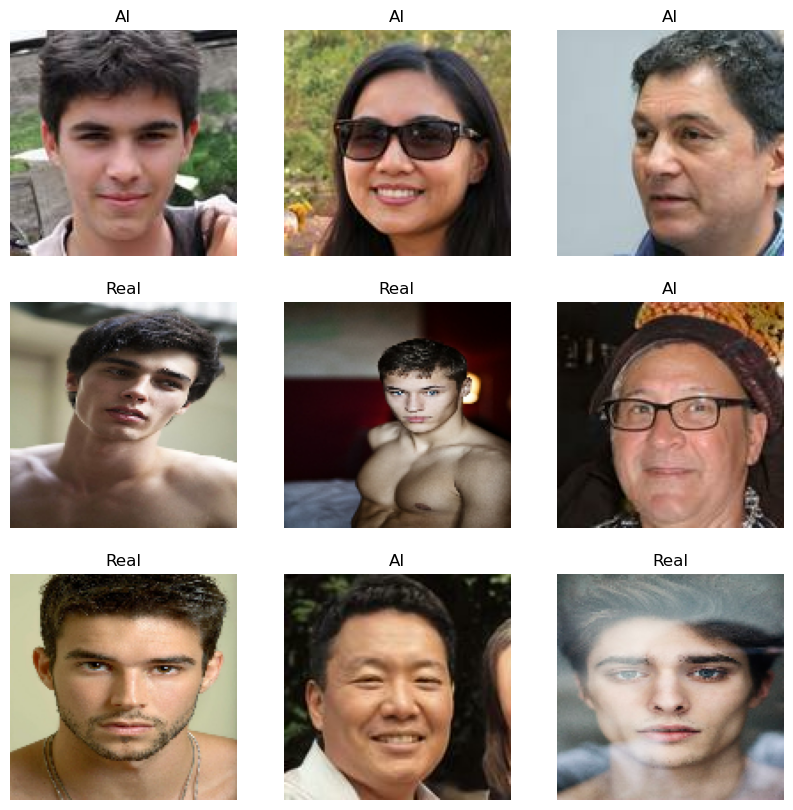

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.Rescaling(1./255)

## Conv2D is the layer to convolve the image into multiple images 

## Activation is the activation function. 

## MaxPooling2D is used to max pool the value from the given size matrix and same is used for the next 2 layers. then, Flatten is used to flatten the dimensions of the image obtained after convolving it. 

## Dense is used to make this a fully connected model and is the hidden layer. 

## Dropout is used to avoid overfitting on the dataset. 

## Dense is the output layer contains only one neuron which decide to which category image belongs.



The convolutions in the earlier layers learn to detect abstract things like edges, textures, etc. Towards the final layer, they learn to detect more specific objects like the ears and nose of the cat or dog, if it’s a cat vs dog classification problem

In [16]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation="sigmoid") # 1 neuron, activation sigmoid
])

In [17]:
precision=tf.keras.metrics.Precision(thresholds=0)
recall=tf.keras.metrics.Recall(thresholds=0)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '../Checkpoints/cls-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=True,
    verbose=1
)

In [19]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


D:\Anaconda\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


167/167 [==============================] - 50s 285ms/step - loss: 0.1672 - accuracy: 0.9210 - val_loss: 0.0341 - val_accuracy: 0.9902
Epoch 2/15
167/167 [==============================] - 47s 272ms/step - loss: 0.0197 - accuracy: 0.9955 - val_loss: 0.0232 - val_accuracy: 0.9940
Epoch 3/15
167/167 [==============================] - 42s 240ms/step - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.0223 - val_accuracy: 0.9925
Epoch 4/15
167/167 [==============================] - 42s 240ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.0121 - val_accuracy: 0.9955
Epoch 5/15
167/167 [==============================] - 41s 237ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0058 - val_accuracy: 0.9985
Epoch 6/15
167/167 [==============================] - 41s 235ms/step - loss: 6.2895e-04 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9977
Epoch 7/15
167/167 [==============================] - 41s 236ms/step - loss: 2.0519e-04 - accuracy: 1.0000 - val_loss: 0.0072 - val_accur

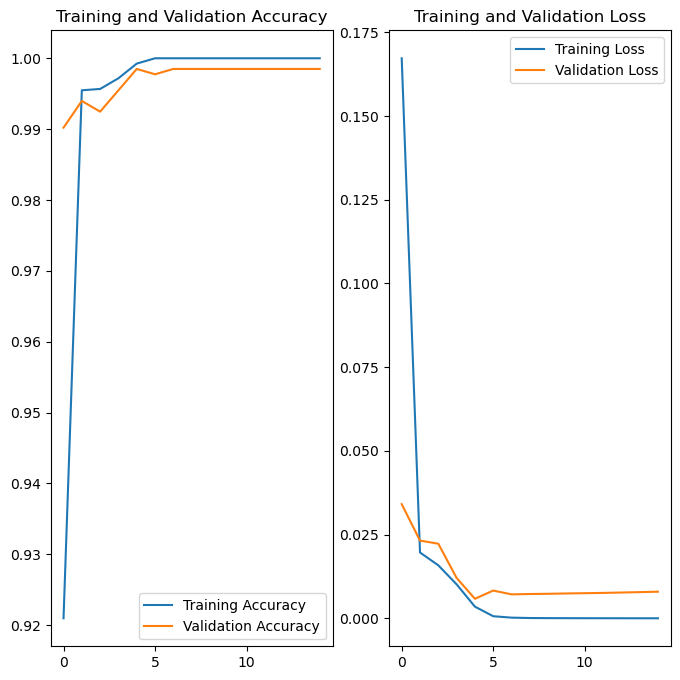

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
loss, accuracy = model.evaluate(val_ds)
print("Test accuracy:", round(accuracy*100,2), "%")

42/42 [==============================] - 6s 108ms/step - loss: 0.0080 - accuracy: 0.9985
Test accuracy: 99.85 %


In [22]:
loss, accuracy = model.evaluate(train_ds)
print("Train accuracy:", round(accuracy*100,2), "%")

167/167 [==============================] - 24s 134ms/step - loss: 1.3186e-05 - accuracy: 1.0000
Train accuracy: 100.0 %


In [23]:
!mkdir -p saved_model
model.save('../Models/my_model')

Ya existe el subdirectorio o el archivo -p.
Error mientras se procesaba: -p.
Ya existe el subdirectorio o el archivo saved_model.
Error mientras se procesaba: saved_model.


INFO:tensorflow:Assets written to: ../Models/my_model\assets


INFO:tensorflow:Assets written to: ../Models/my_model\assets


In [24]:
image_path = '../Test/'+input()+'.jpg'

img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

AI/ml
1/1 [==============================] - 0s 89ms/step
This image most likely belongs to AI with a 73.09 percent confidence.


In [25]:
np.argmax(score)

0

In [28]:

def classifier():
    display(Image('../Logo/yo, robot.jpg', width=800))
    print("Please input folder:")
    folder=input()
    print("Please input file name:")
    name=input()
    image_path = '../Test/'+folder+'/'+name+'.jpg'

    img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

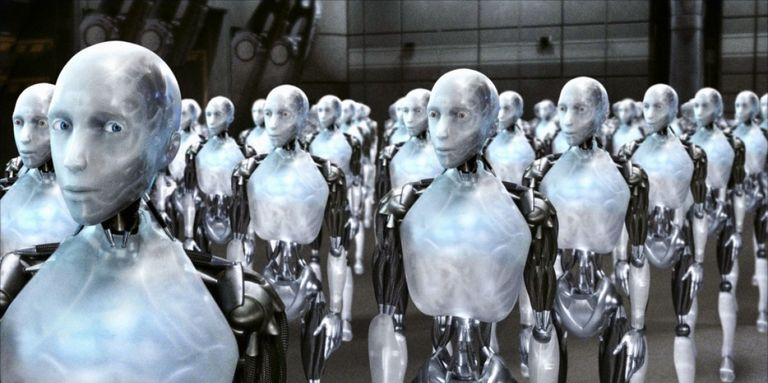

Please input folder:
AI
Please input file name:
ml
1/1 [==============================] - 0s 17ms/step
This image most likely belongs to AI with a 73.09 percent confidence.


In [29]:
classifier()


In [30]:
import pandas as pd

class_label = ['AI','Real']
img_path='../Images/'
img_list = []
label_list = []
for label in class_label:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)
        
df = pd.DataFrame({'img':img_list, 'label':label_list})

In [31]:
df.label.value_counts()

AI      3354
Real    3289
Name: label, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
y=df.label
X=df.img
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=123)

In [33]:
y_prediction = np.array([])
labels =  np.array([])
for x, y in val_ds:

    y_prediction = np.concatenate([y_prediction, np.argmax(model.predict(x), axis = -1)])
    labels = np.concatenate([labels,y.numpy()])

cm=tf.math.confusion_matrix(labels=labels, predictions=y_prediction).numpy()

1/1 [==============================] - 0s 35ms/step


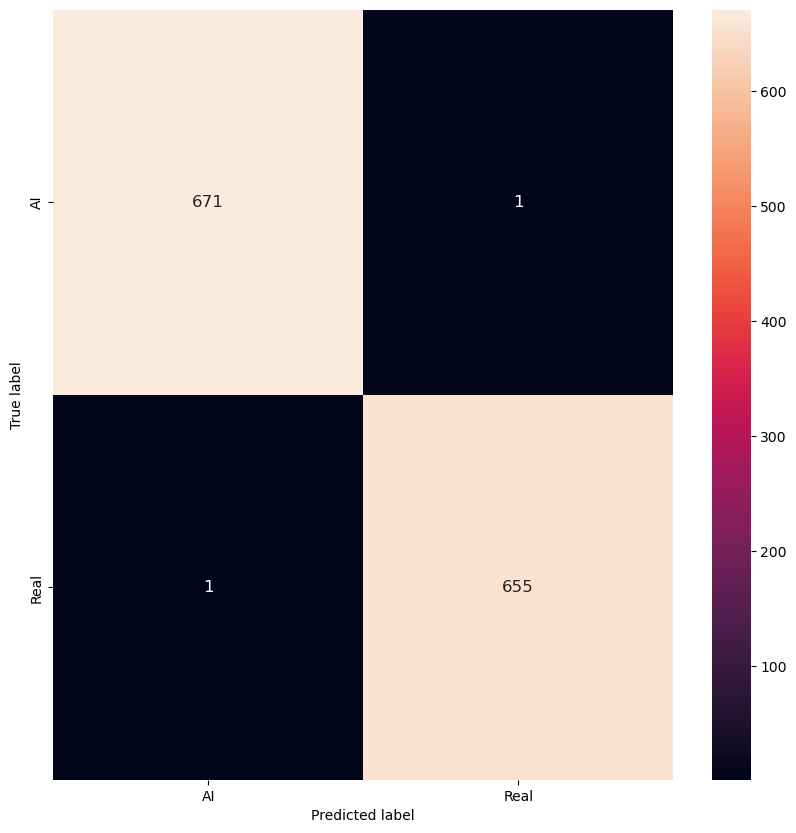

In [34]:
cm = pd.DataFrame(cm, range(2),range(2))
plt.figure(figsize = (10,10))
categories=["AI", "Real"]
sns.heatmap(cm, annot=True,  fmt='g', annot_kws={"size": 12}, yticklabels=class_names, xticklabels=class_names) # font size
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(labels, y_prediction, target_names=class_names))

              precision    recall  f1-score   support

          AI       1.00      1.00      1.00       672
        Real       1.00      1.00      1.00       656

    accuracy                           1.00      1328
   macro avg       1.00      1.00      1.00      1328
weighted avg       1.00      1.00      1.00      1328



In [ ]:
classifier()

In [ ]:
classifier()

In [36]:

def classifier2():
    img_height = 128
    img_width = 128
    class_names=['AI', 'Real']
    display(Image('../Logo/yo, robot.jpg', width=800))
    print("Please input folder:")
    folder=input()
    print("Please input file name:")
    name=input()
    image_path = '../Test/'+folder+'/'+name+'.jpg'

    img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    model = tf.keras.models.load_model('../Models/my_model')

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
classifier2()

In [38]:
%%writefile -a ai_classifier0.py
def classifier_f():
    img_height = 128
    img_width = 128
    class_names=['AI', 'Real']
    
    

    img = tf.keras.utils.load_img(
    image, target_size=(img_height, img_width)
)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    model = tf.keras.models.load_model('../Models/my_model')

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Appending to ai_classifier0.py


In [ ]:
%run ai_classifier0